In [ ]:
import sys
sys.executable

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
 

In [6]:
df = pd.read_csv("https://raw.githubusercontent.com/krishnaik06/K-NEarest-Neighbor/master/Classified%20Data", index_col=0)

In [7]:
df.head(2)

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0


# Standardize

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()
scaler.fit(df.drop("TARGET CLASS", axis=1))
scaled_feature = scaler.transform(df.drop('TARGET CLASS', axis=1))

In [10]:
df_feat = pd.DataFrame(scaled_feature, columns=df.columns[:-1])
df_feat.head(2)

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759


# Train Test

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train, x_test, y_train, y_test = train_test_split(scaled_feature, df["TARGET CLASS"], test_size = 0.30)

# Using Knn

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [15]:
predict_ = knn.predict(x_test)

# Predictions Evaluating

In [16]:
from sklearn.metrics import classification_report, confusion_matrix

In [17]:
confusion_matrix(y_test, predict_)

array([[134,  19],
       [ 15, 132]], dtype=int64)

In [18]:
print(classification_report(y_test, predict_))

precision    recall  f1-score   support

           0       0.90      0.88      0.89       153
           1       0.87      0.90      0.89       147

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300



# Choosing a K Value

In [19]:
error_rate = []

for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    predicting = knn.predict(x_test)
    error_rate.append(np.mean(predicting != y_test))

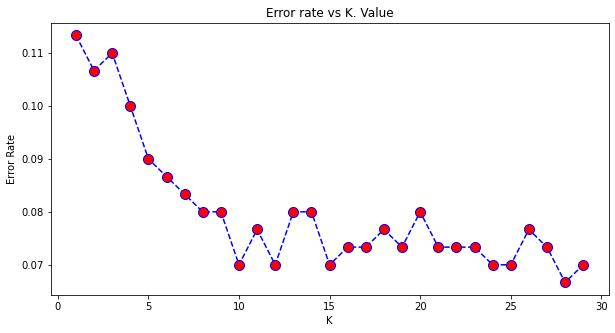

In [20]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(range(1,30), error_rate, color='blue', linestyle='dashed',marker='o', markerfacecolor='red', markersize=10)
plt.title("Error rate vs K. Value")
plt.xlabel("K")
plt.ylabel('Error Rate')
plt.show()

# Finally

In [21]:
knn = KNeighborsClassifier(n_neighbors=28)
knn.fit(x_train, y_train)
predicting = knn.predict(x_test)

In [22]:
print(confusion_matrix(y_test, predicting));print()
print(classification_report(y_test, predicting))

[[138  15]
 [  5 142]]

              precision    recall  f1-score   support

           0       0.97      0.90      0.93       153
           1       0.90      0.97      0.93       147

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.94      0.93      0.93       300

